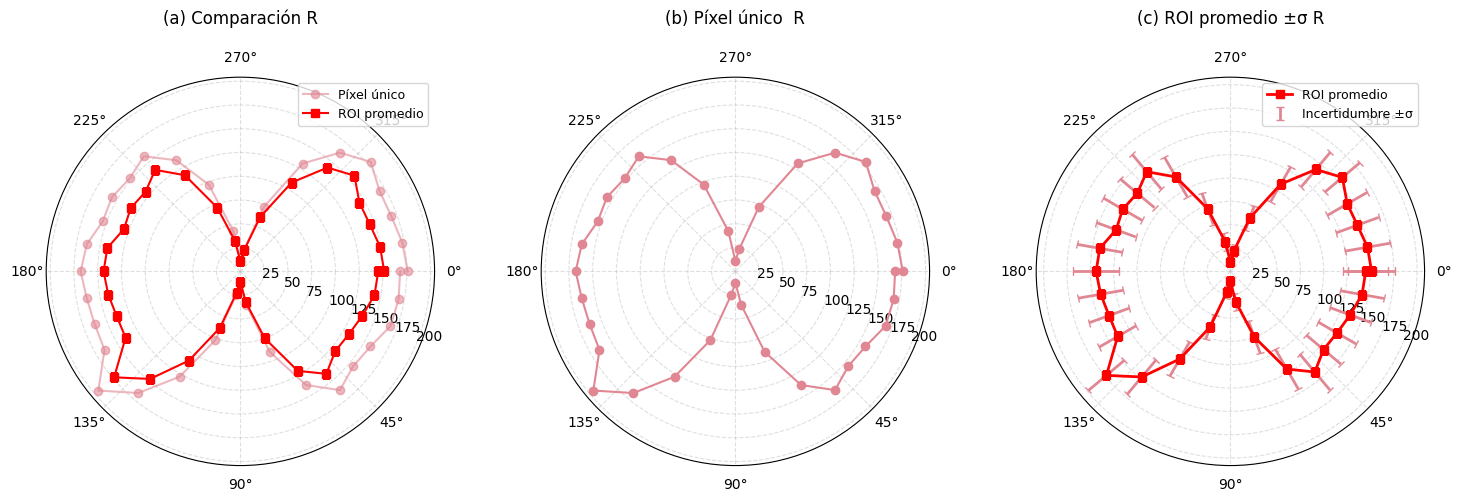

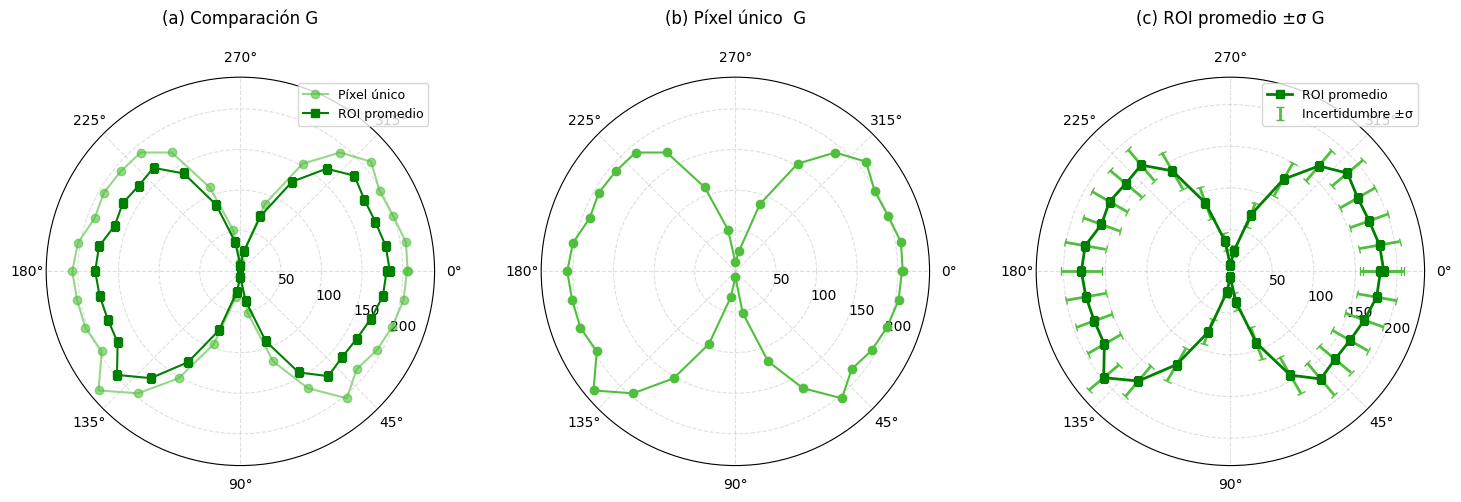

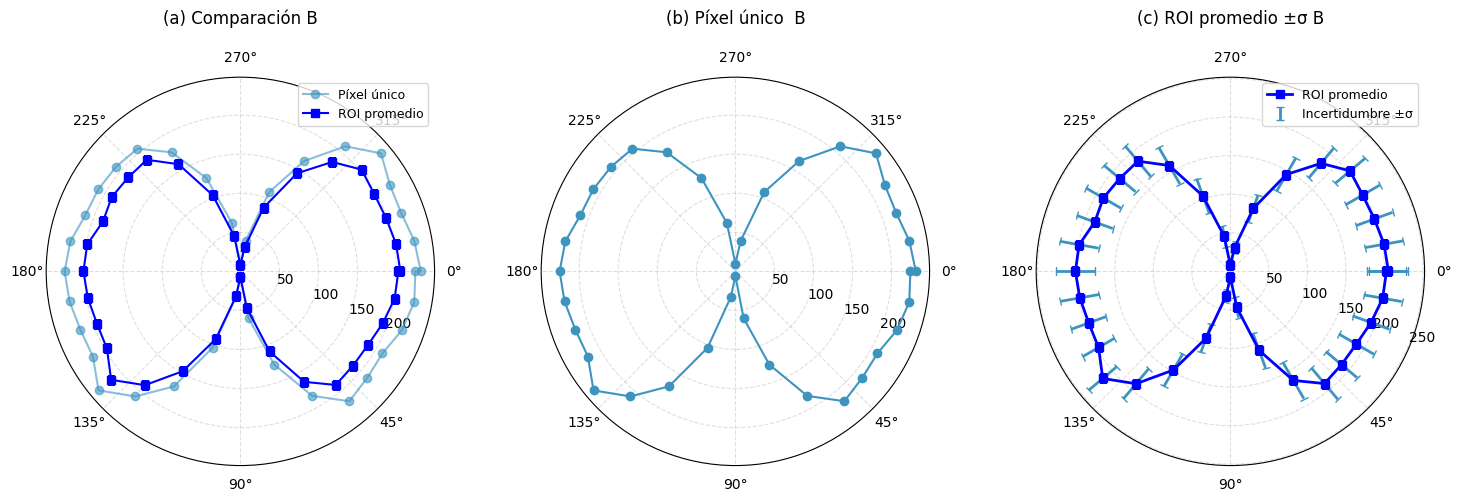

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carga de datos
def cargar_datos(pixel_csv, roi_csv, color_name, color_pix, color_roi):
    p = pd.read_csv(pixel_csv)    # para píxel
    r = pd.read_csv(roi_csv)      # para ROI completa

    # Detectar nombres
    col_mean_p = [c for c in p.columns if c.strip().startswith("Mean")][0]      # como el ImageJ le cambia los nombres a las cosas toca así
    col_mean_r = [c for c in r.columns if c.strip().startswith("Mean")][0]

    if "StdDev" in r.columns:
       col_std_r = "StdDev"
    else:
       col_std_r = None  # para píxel, que no está

    n = min(len(p), len(r))
    angles_deg = np.arange(0, 10*n, 10)  # pasos de 10°
    angles_rad = np.deg2rad(angles_deg)

    pixel_mean = p[col_mean_p].to_numpy()[:n]
    roi_mean = r[col_mean_r].to_numpy()[:n]
    roi_std = r[col_std_r].to_numpy()[:n] if col_std_r else np.zeros(n)

    return angles_deg, angles_rad, pixel_mean, roi_mean, roi_std, color_name, color_pix, color_roi


# --- Archivos de entrada (ajusta si difieren) ---
datasets = [
    cargar_datos("PixelRed.csv", "ResultsRed.csv", "Rojo", "#E08793", "red"),
    cargar_datos("PixelGREEN.csv", "ResultsGREEN.csv", "Verde", "#50BF3D", "green"),
    cargar_datos("PixelBLUE.csv", "ResultsBLUE.csv", "Azul", "#3D94BF", "blue"),
]

# Gráficas

plt.rcParams.update({'axes.titlesize': 12, 'axes.labelsize': 11})

for angles_deg, angles_rad, pix, roi, std, name, color_pix, color_roi in datasets:
    fig, axes = plt.subplots(1, 3, subplot_kw={'projection': 'polar'}, figsize=(15, 5))

    # Comparación píxel y ROI
    ax = axes[0]
    ax.plot(angles_rad, pix, 'o-', color=color_pix, alpha=0.6, label='Píxel único')
    ax.plot(angles_rad, roi, 's-', color=color_roi, label='ROI promedio')
    #ax.set_title(f"(a) Comparación ({name.lower()})")
    ax.set_theta_zero_location("E")   # 0° sobre eje x
    ax.set_theta_direction(-1)        # sentido horario
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend(loc='upper right', fontsize=9)

    # --------------- (b) Solo píxel único
    ax = axes[1]
    ax.plot(angles_rad, pix, 'o-', color=color_pix)
    #ax.set_title(f"(b) Píxel único ({name.lower()})")
    ax.set_theta_zero_location("E")
    ax.set_theta_direction(-1)
    ax.grid(True, linestyle='--', alpha=0.4)

    # --------------- (c) Solo ROI promedio ±σ (con incertidumbre)
    ax = axes[2]

# Dibujar primero las barras de error (incertidumbre)
    ax.errorbar(
        angles_rad, roi, yerr=std,
        fmt='none', ecolor=color_pix, elinewidth=2, capsize=3, label='Incertidumbre ±σ'
    )

# Luego los puntos y la línea del ROI promedio
    ax.plot(angles_rad, roi, 's-', color=color_roi, linewidth=2, label='ROI promedio')

    #ax.set_title(f"(c) ROI promedio ±σ ({name.lower()})")
    ax.set_theta_zero_location("E")
    ax.set_theta_direction(-1)
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend(loc='upper right', fontsize=9)

    canal_abrev = {"Rojo": "R", "Verde": "G", "Azul": "B"}[name]

    axes[0].text(0.5, 1.15, f"(a) Comparación {canal_abrev}",
                transform=axes[0].transAxes, ha='center', va='center', fontsize=12)
    axes[1].text(0.5, 1.15, f"(b) Píxel único  {canal_abrev}",
                transform=axes[1].transAxes, ha='center', va='center', fontsize=12)
    axes[2].text(0.5, 1.15, f"(c) ROI promedio ±σ {canal_abrev}",
                transform=axes[2].transAxes, ha='center', va='center', fontsize=12)

    #plt.suptitle(f"Irradiancia vs ángulo — Canal {name}", fontsize=14)
    plt.tight_layout()
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.subplots_adjust(top=0.85)
    plt.savefig(f"panel_{name.lower()}.png", dpi=300)
    plt.show()
